<a href="https://colab.research.google.com/github/galav12/CSC442-Project/blob/main/Tanmay_Kapse_Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Colab File Upload

In [ ]:
!git clone https://github.com/galav12/CSC442-Project.git

Cloning into 'CSC442-Project'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 56 (delta 23), reused 22 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 29.78 MiB | 18.97 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
%cd CSC442-Project/
!ls

/content/CSC442-Project
'CSC442 Dataset Report (1).pdf'   data	 dataset_cleaner.ipynb	 README.md   teamnotes


## Cleaning Pollution Dataset

In [ ]:
pollution_full = pd.read_csv("data/Pollution.zip", compression="zip")
pollution_full.shape

(1746661, 29)

In [ ]:
pollution = pollution_full[(pollution_full["Date Local"].str[:4] <=  "2015") & (pollution_full["Date Local"].str[:4] >=  "2011") & (pollution_full["State"] != "District Of Columbia")]
pollution = pollution[["State","Date Local","NO2 Mean","NO2 1st Max Value","NO2 AQI","O3 Mean","O3 1st Max Value","O3 AQI","SO2 Mean","SO2 1st Max Value","SO2 AQI","CO Mean","CO 1st Max Value","CO AQI"]]
pollution["Year"] = pollution["Date Local"].str[:4]
pollution['Year'] = pollution['Year'].astype(int)
pollution = pollution.drop(columns=["Date Local"])
print(pollution.shape)

(640025, 14)


In [ ]:
pollution["NO2 AQI"] = pollution["NO2 AQI"].astype(np.float64)
pollution["O3 AQI"] = pollution["O3 AQI"].astype(np.float64)
pollution.info()


<class 'pandas.core.frame.DataFrame'>
Index: 640025 entries, 1072382 to 1722056
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              640025 non-null  object 
 1   NO2 Mean           640025 non-null  float64
 2   NO2 1st Max Value  640025 non-null  float64
 3   NO2 AQI            640025 non-null  float64
 4   O3 Mean            640025 non-null  float64
 5   O3 1st Max Value   640025 non-null  float64
 6   O3 AQI             640025 non-null  float64
 7   SO2 Mean           640025 non-null  float64
 8   SO2 1st Max Value  640025 non-null  float64
 9   SO2 AQI            320210 non-null  float64
 10  CO Mean            640025 non-null  float64
 11  CO 1st Max Value   640025 non-null  float64
 12  CO AQI             319955 non-null  float64
 13  Year               640025 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 73.2+ MB


In [ ]:
# Aggregating pollution by state and year
pollution_no_outliers = pollution.copy()
for col in pollution_no_outliers.columns[1:]:
        pollution_no_outliers = pollution_no_outliers[(pollution_no_outliers[col] >= pollution_no_outliers[col].quantile(0.05)) & (pollution_no_outliers[col] <= pollution_no_outliers[col].quantile(0.95))]

pollution_state = pollution_no_outliers.groupby(["State","Year"]).aggregate('mean').reset_index()
pollution_state.shape

(188, 14)

In [ ]:
# pollution_state.to_csv("data/pollution_clean.csv",index=False)

## Cleaning Heart Disease Dataset

In [ ]:
heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")
heart_full.shape

<ipython-input-9-1f9cd1d613a9>:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")


(85800, 29)

In [ ]:
heart = heart_full[["Year","LocationDesc","Category","Topic","Data_Value_Type","Data_Value","Break_Out_Category","Break_out"]]
heart = heart.pivot_table(index=["Year", "LocationDesc", "Category", "Topic", "Break_Out_Category", "Break_out"], columns="Data_Value_Type", values="Data_Value").reset_index()
heart = heart.drop(columns=["Age-Standardized"])
heart = heart.pivot_table(index=["Year","LocationDesc","Category","Topic"], columns=["Break_Out_Category", "Break_out"], values="Crude").reset_index()

heart.columns = (col[0]+'_'+col[1] if col[1] != '' else col[0] for col in heart.columns)

heart.shape

(2556, 19)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     2556 non-null   int64  
 1   LocationDesc             2556 non-null   object 
 2   Category                 2556 non-null   object 
 3   Topic                    2556 non-null   object 
 4   Age_18-24                846 non-null    float64
 5   Age_20-24                322 non-null    float64
 6   Age_25-44                2114 non-null   float64
 7   Age_35+                  2556 non-null   float64
 8   Age_45-64                2556 non-null   float64
 9   Age_65+                  2556 non-null   float64
 10  Age_75+                  2551 non-null   float64
 11  Gender_Female            2556 non-null   float64
 12  Gender_Male              2556 non-null   float64
 13  Overall_Overall          2556 non-null   float64
 14  Race_Hispanic           

In [ ]:
# heart.to_csv("data/heart_clean.csv",index=False)

## Merging Dataset

In [ ]:
merged = pd.merge(heart, pollution_state, left_on=["LocationDesc","Year"], right_on=["State","Year"], how="left")

In [ ]:
merged = merged[merged["State"].notna()]
merged = merged.drop(columns=["State"])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1841 entries, 22 to 2555
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1841 non-null   int64  
 1   LocationDesc             1841 non-null   object 
 2   Category                 1841 non-null   object 
 3   Topic                    1841 non-null   object 
 4   Age_18-24                595 non-null    float64
 5   Age_20-24                237 non-null    float64
 6   Age_25-44                1525 non-null   float64
 7   Age_35+                  1841 non-null   float64
 8   Age_45-64                1841 non-null   float64
 9   Age_65+                  1841 non-null   float64
 10  Age_75+                  1837 non-null   float64
 11  Gender_Female            1841 non-null   float64
 12  Gender_Male              1841 non-null   float64
 13  Overall_Overall          1841 non-null   float64
 14  Race_Hispanic            130

In [ ]:
# merged.to_csv("data/merged.csv",index=False)

## Outliers

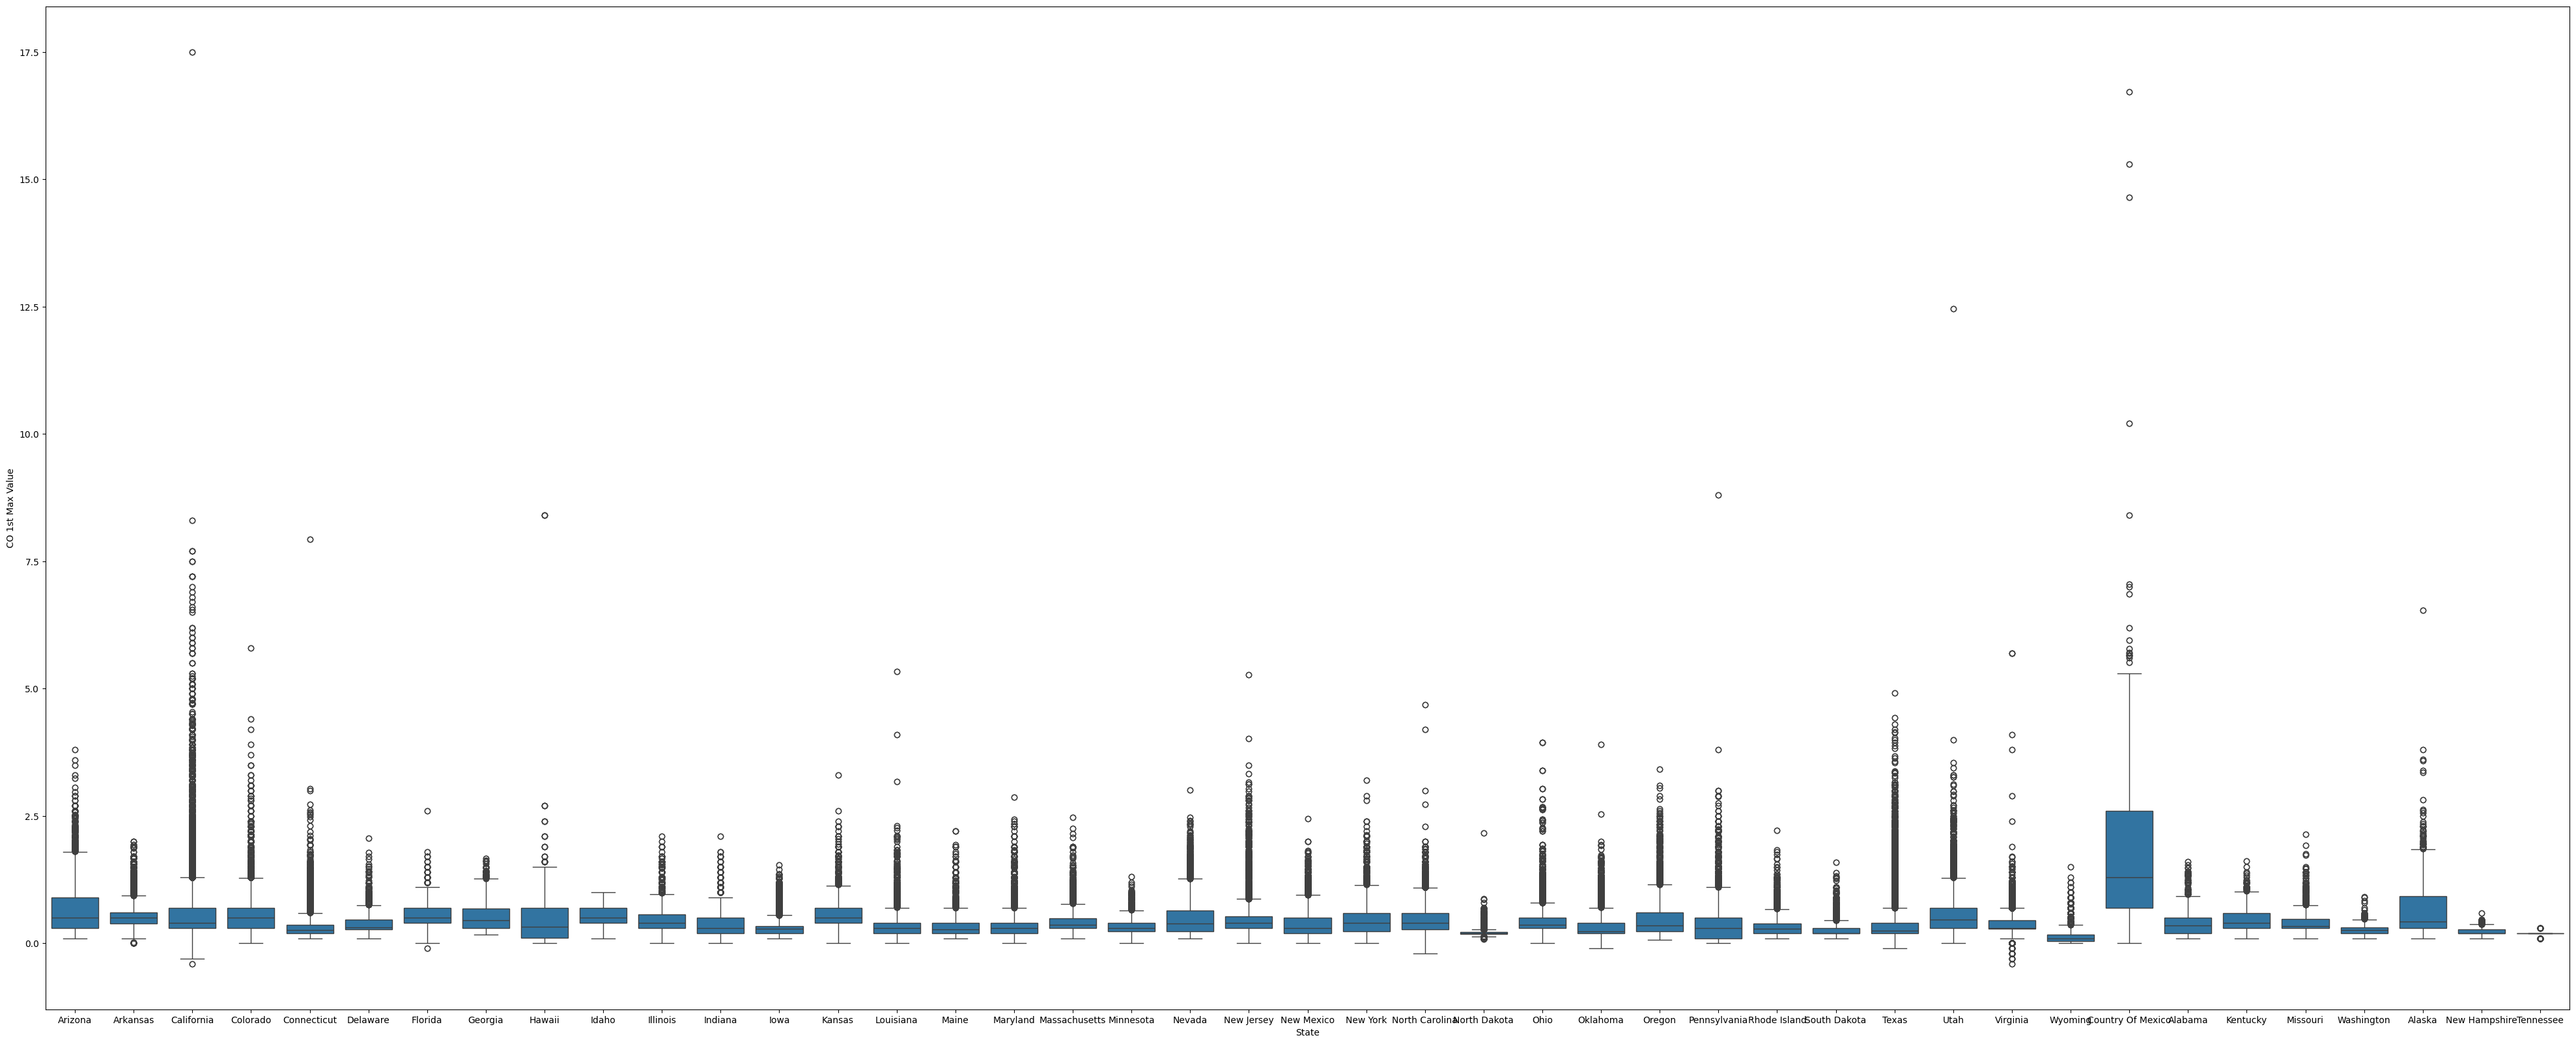

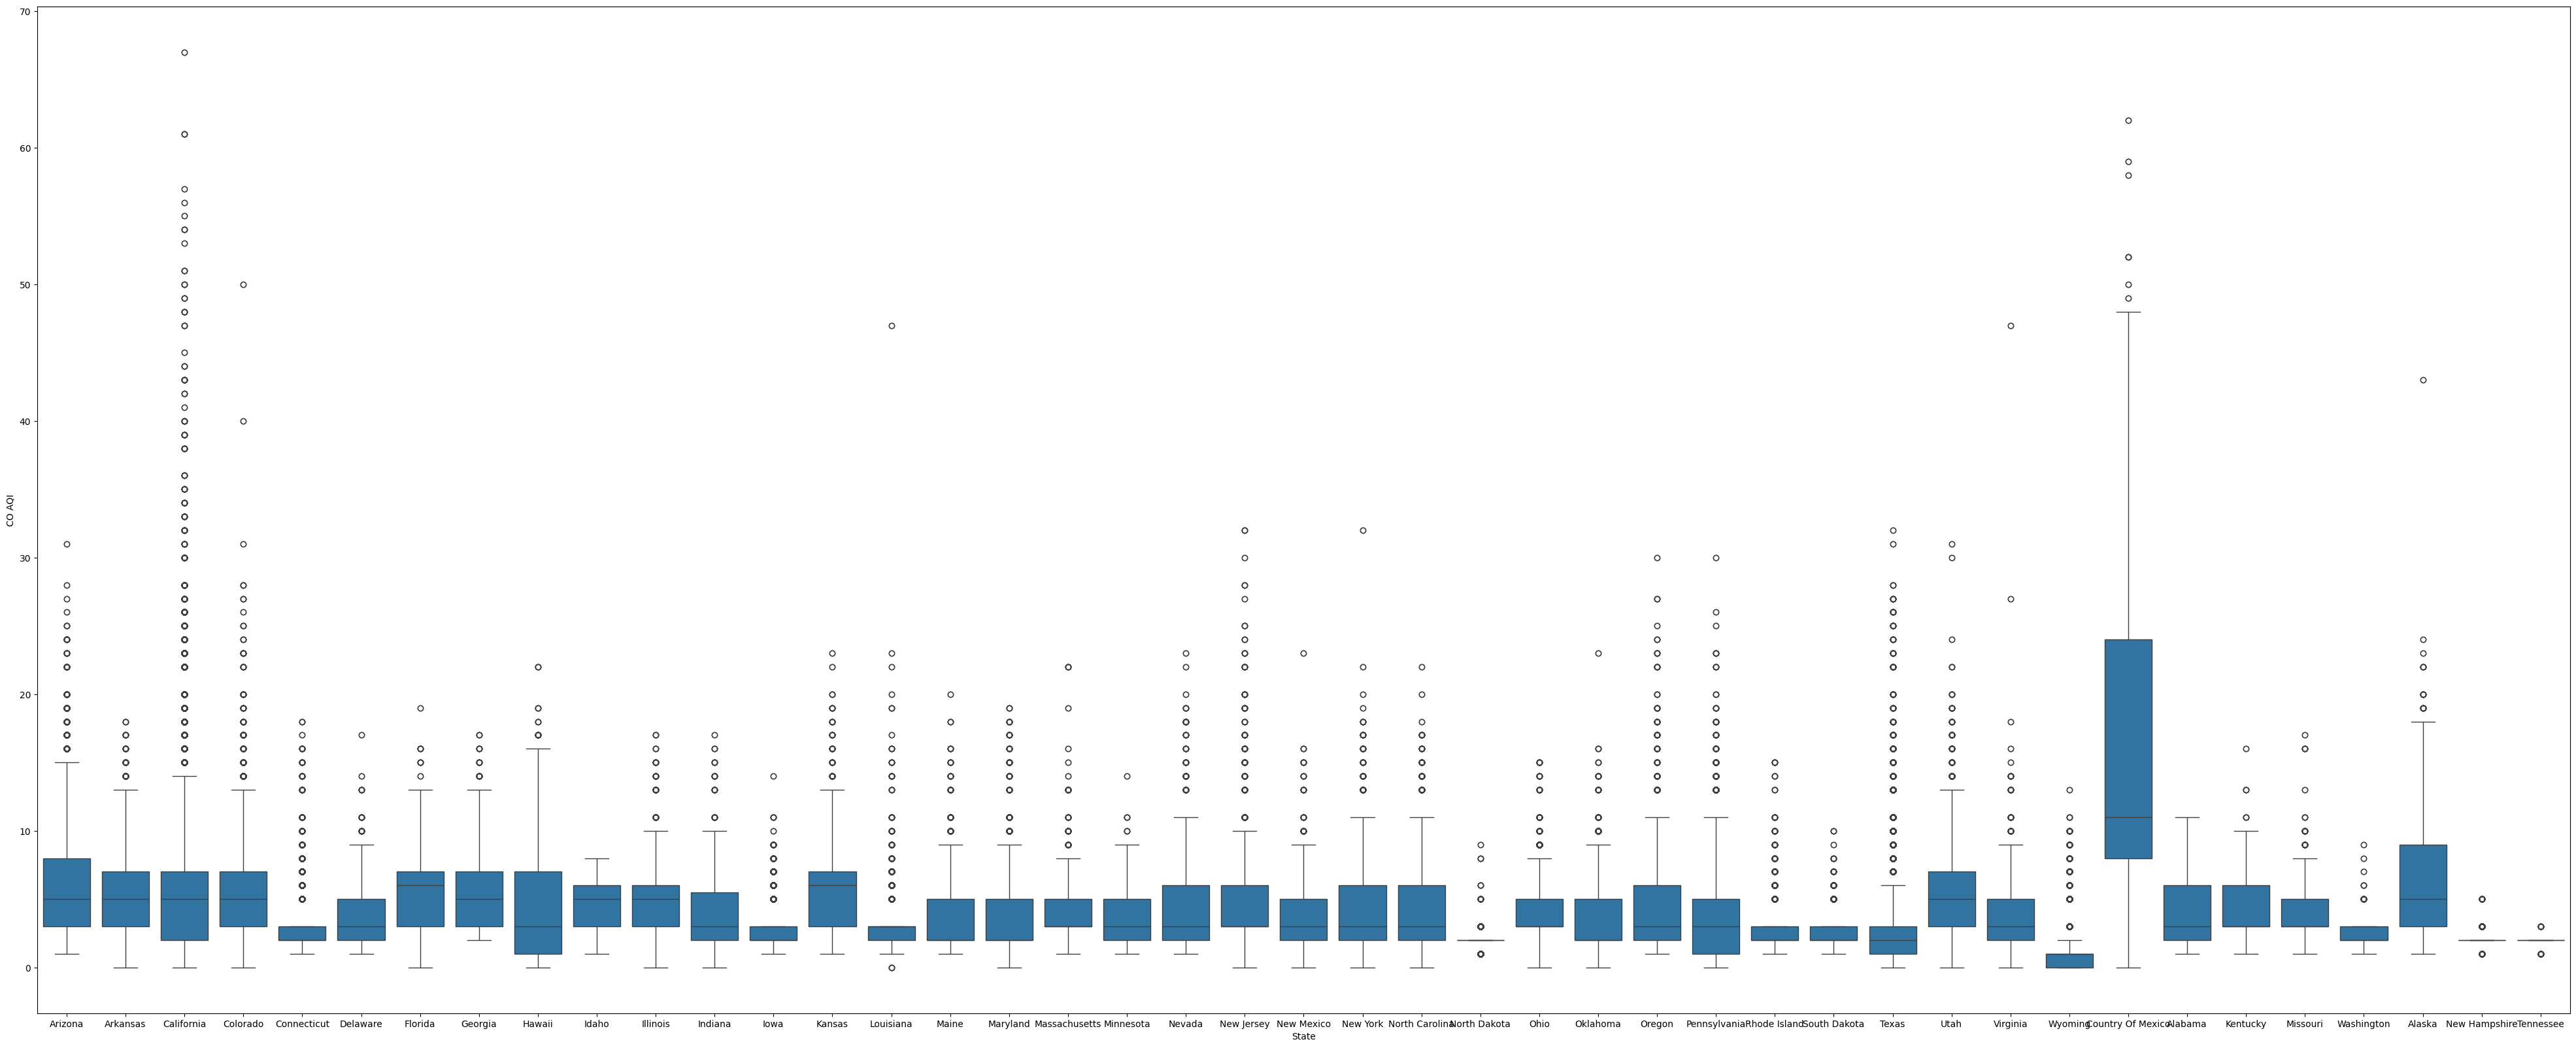

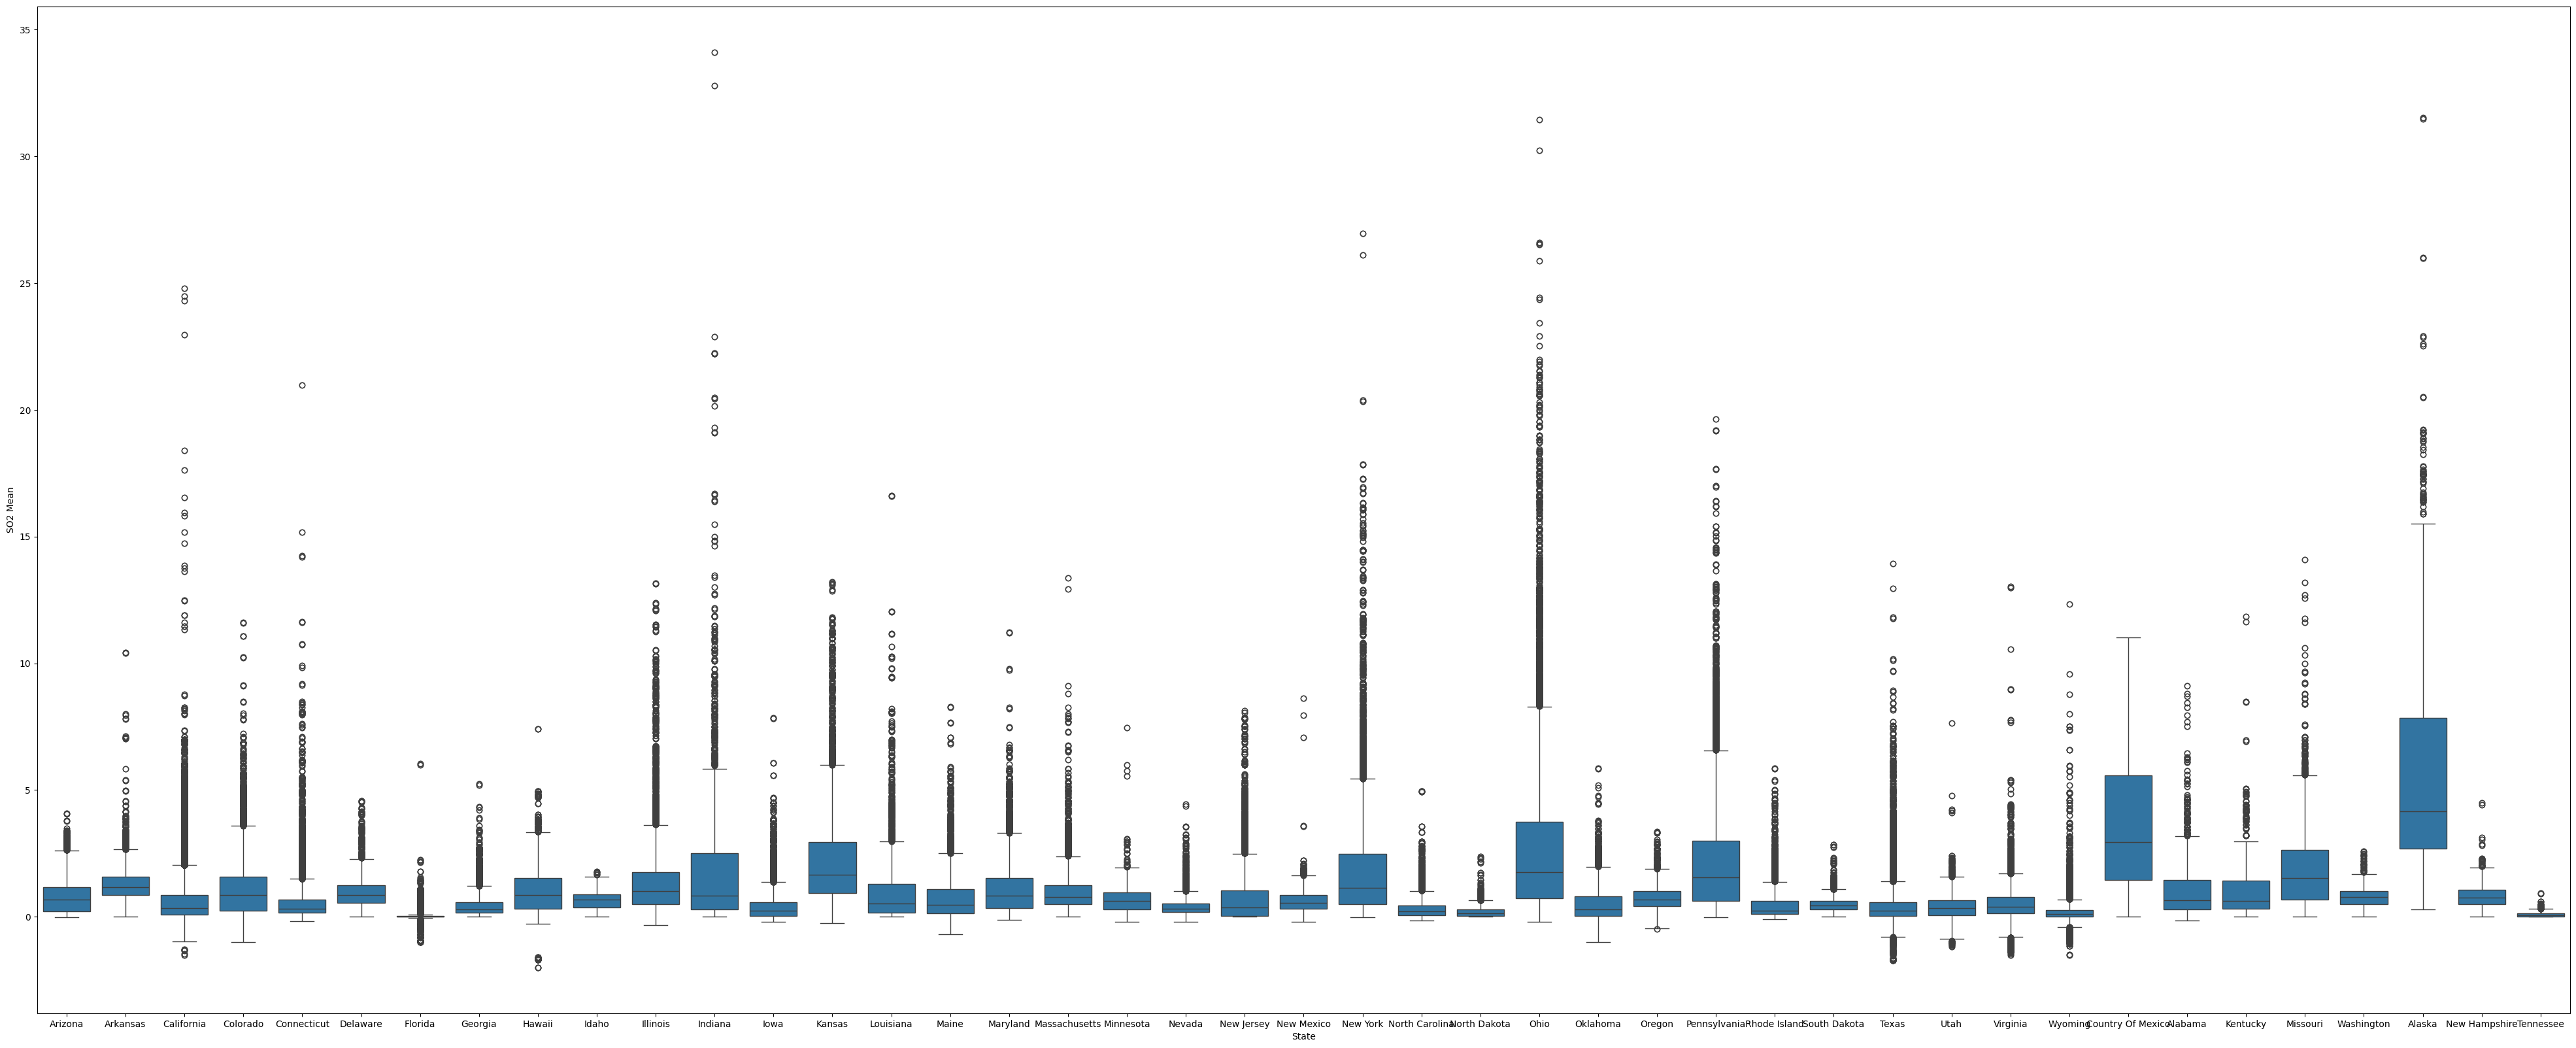

In [ ]:
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['CO 1st Max Value'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['CO AQI'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['SO2 Mean'])
plt.show()

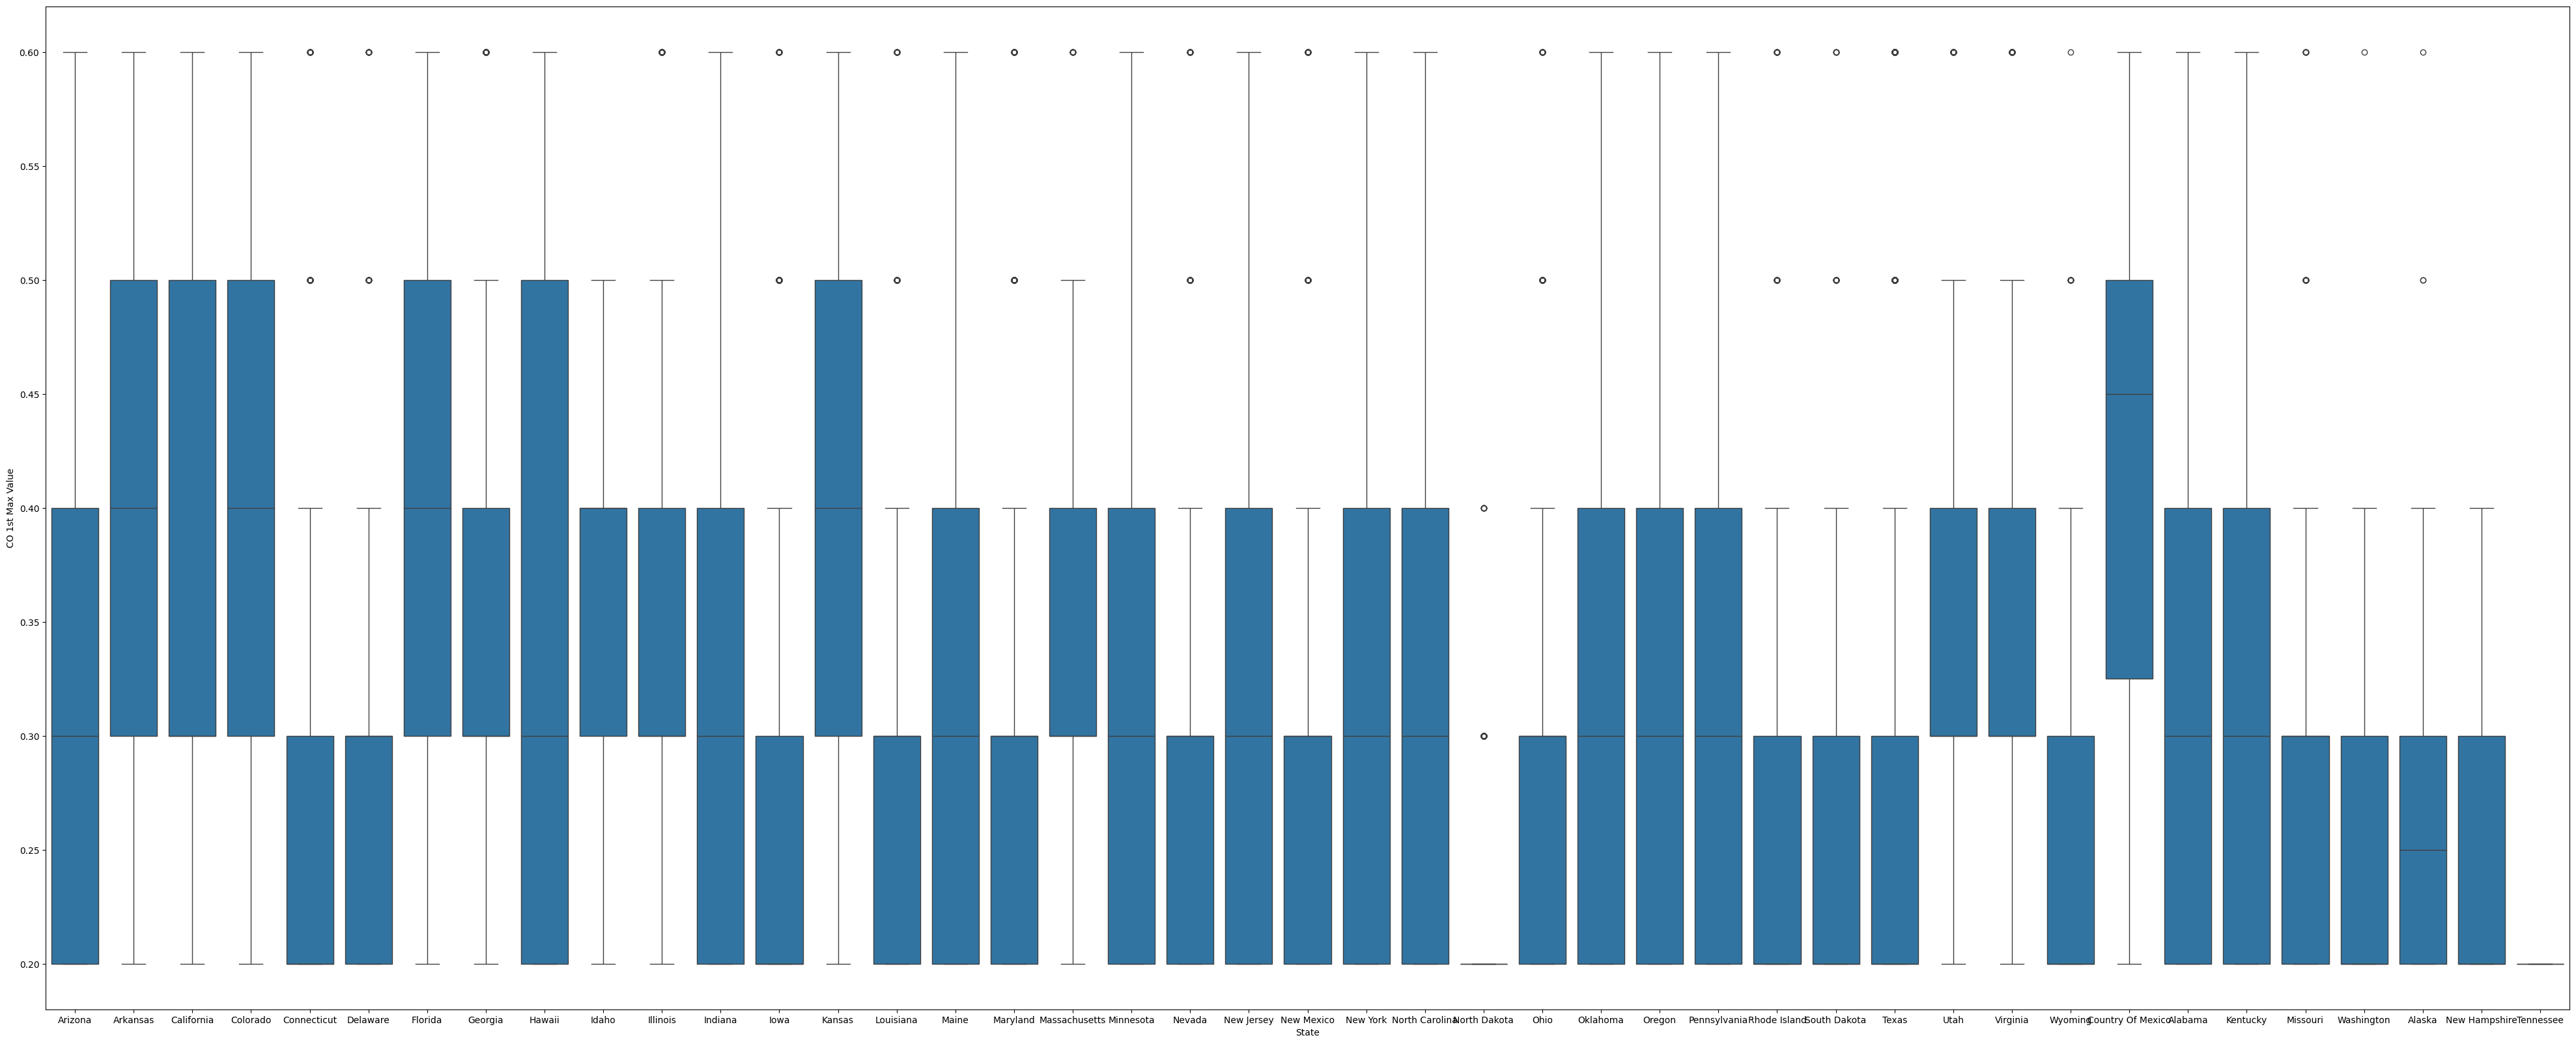

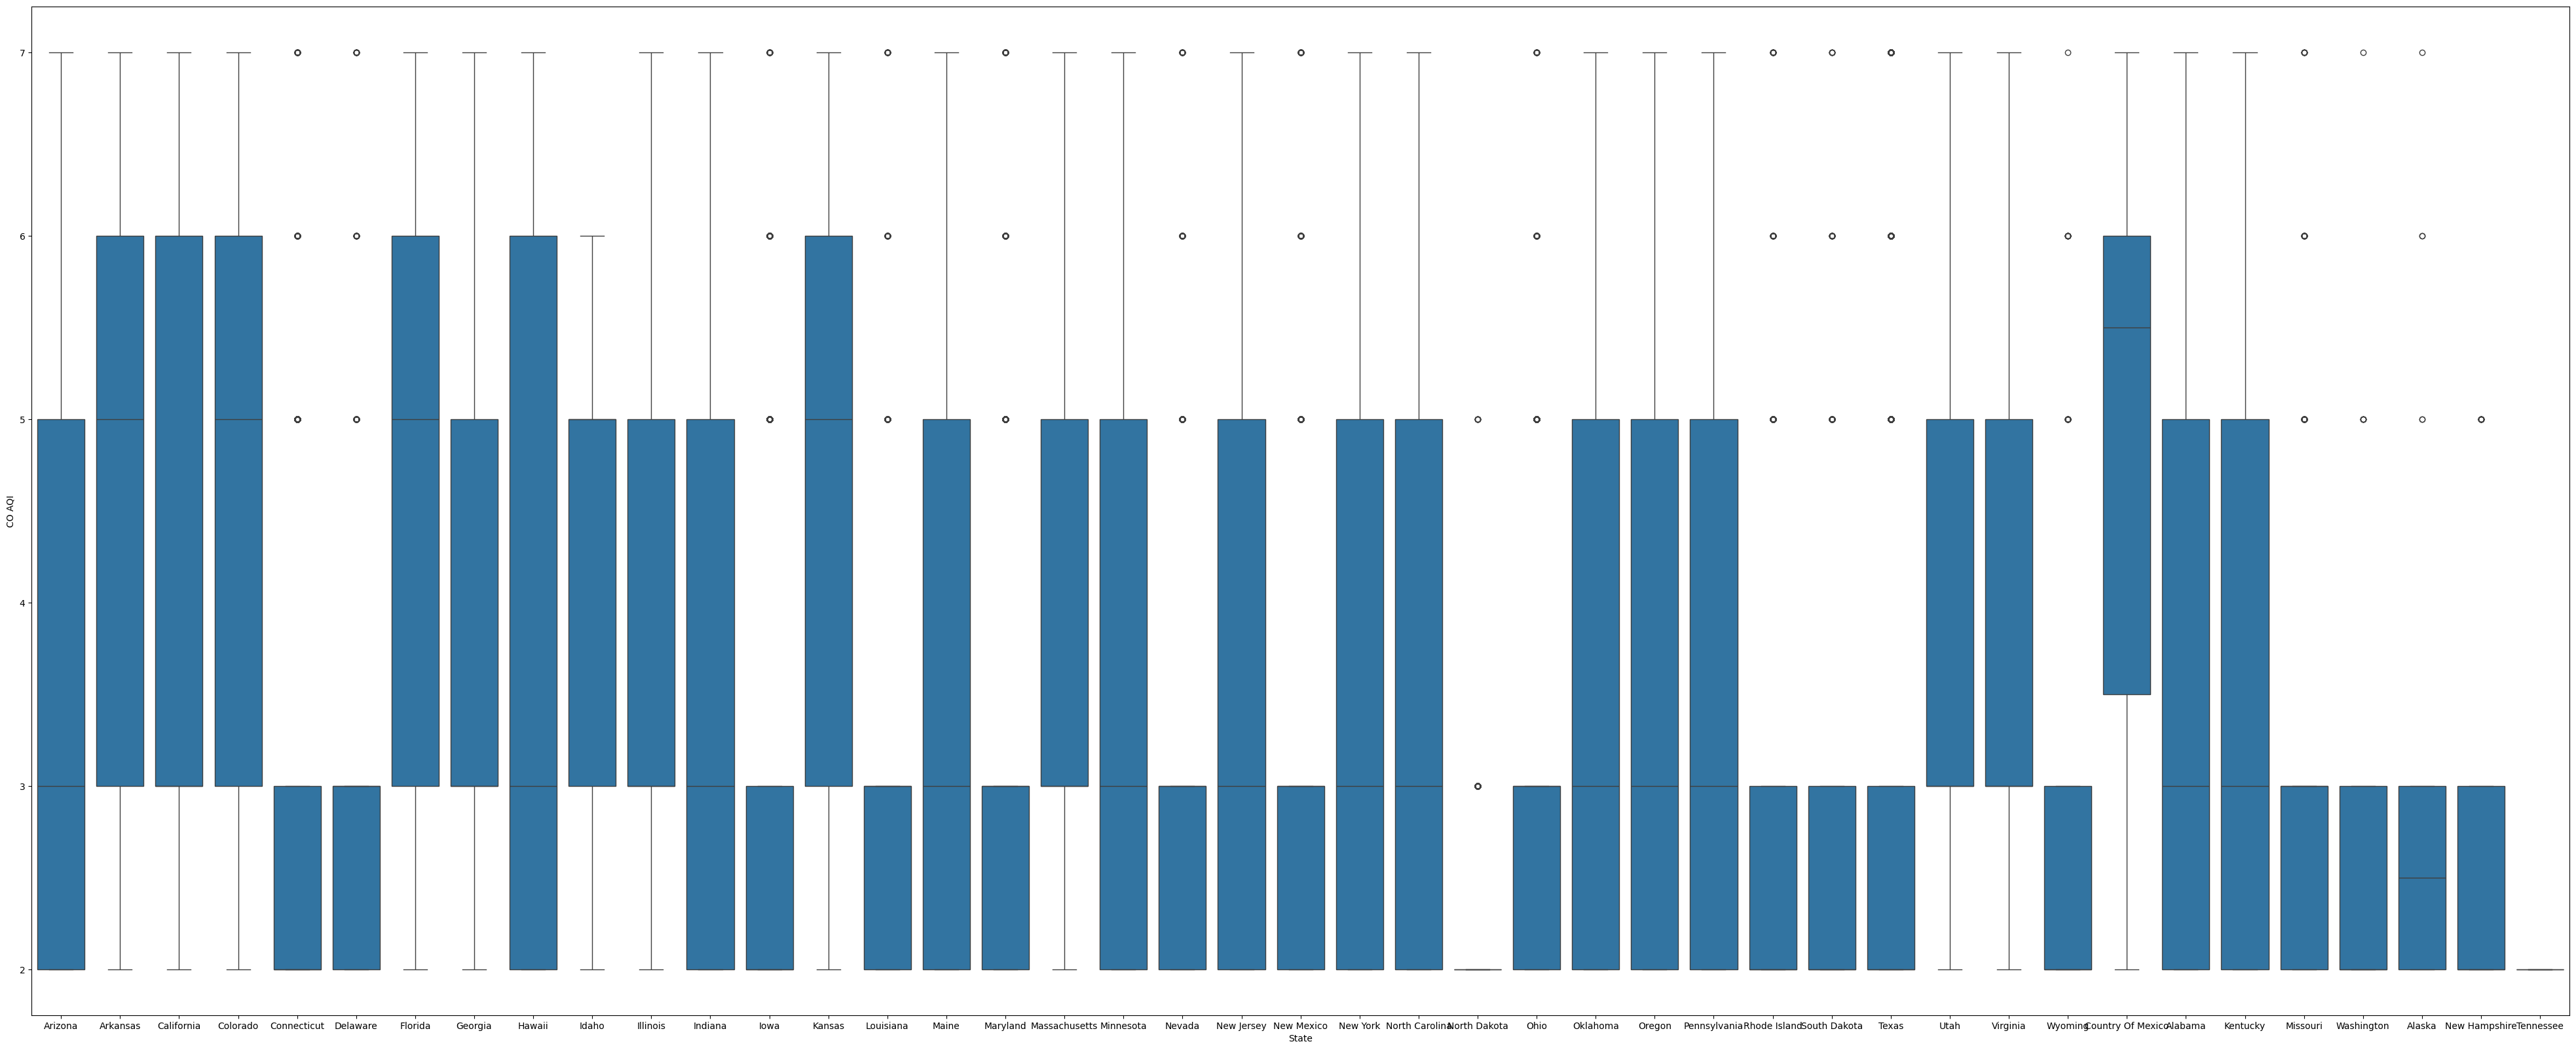

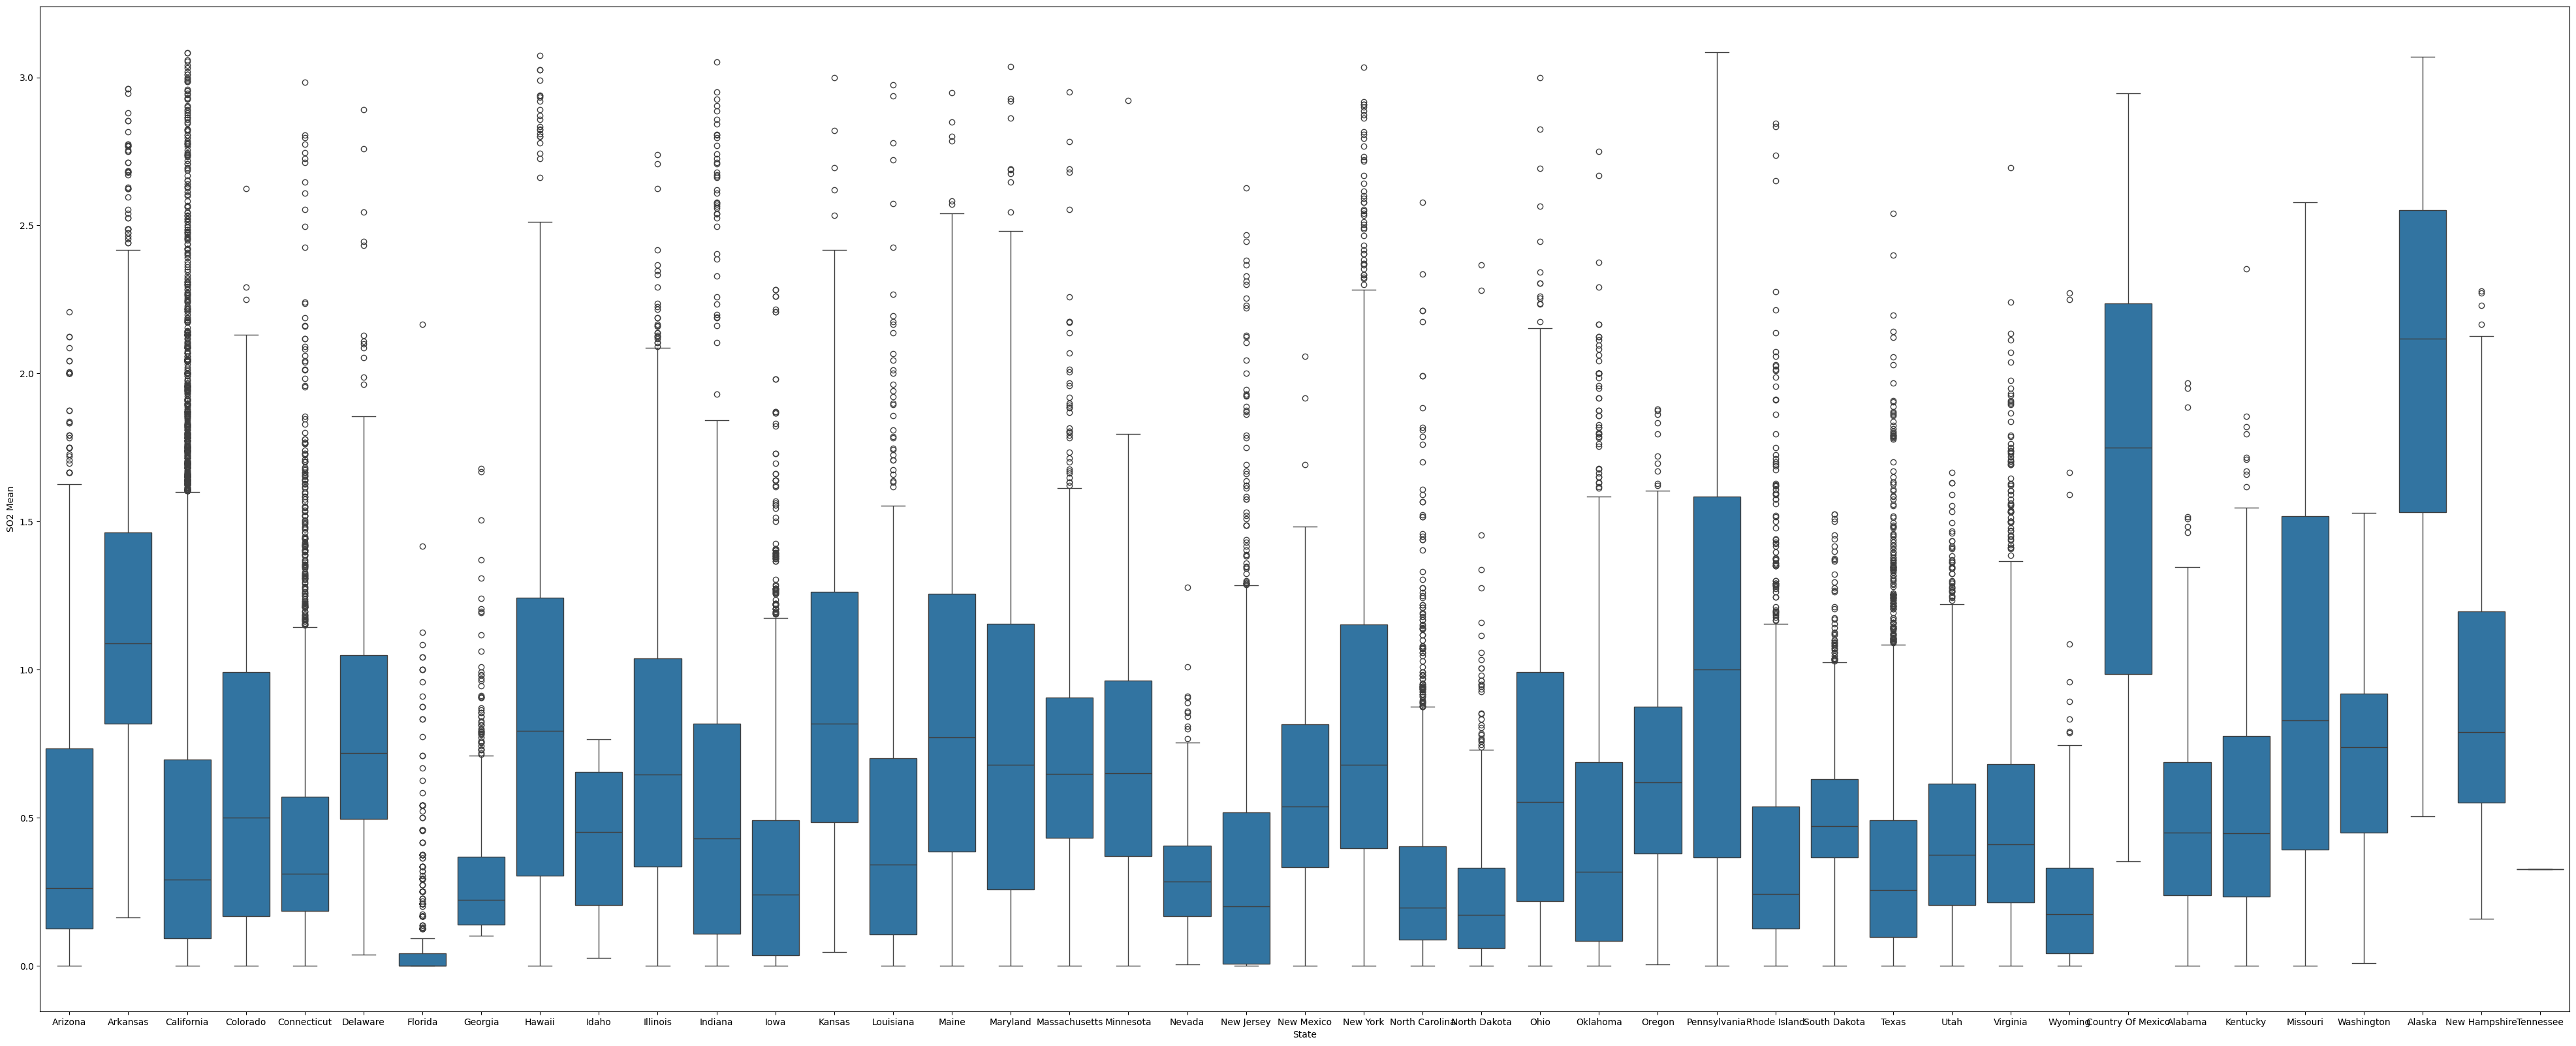

In [ ]:
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO 1st Max Value'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO AQI'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['SO2 Mean'])
plt.show()

## Querying

In [ ]:
# I will be querying rows based on Disease type or Risk Factor, and will be including percentages in Gender, Age and Race Columns.

In [ ]:
import time

newRead = "/content/merged_data_short.csv"
newDF = pd.read_csv(newRead)

start_time = time.time()

query = newDF[newDF["Category"].isin (["Cardiovascular Diseases", "Risk Factors"])] [["Year", "Category", "Topic", "Gender-Female", "Gender-Male", "Age-18-24", "Age-25-44", "Age-45-64", "Age-65+", "Age-75+","Race-Hispanic", "Race-Non-Hispanic White", "Race-Non-Hispanic Black", "Race-Other"]]
end_time = time.time()

print(query.head(2))
print("\nTotal Rows Returned:", len(query))
print("Query Execution Time:", round(end_time - start_time, 4), "seconds")

   Year                 Category                                       Topic  \
0  2011  Cardiovascular Diseases  Acute Myocardial Infarction (Heart Attack)   
1  2011  Cardiovascular Diseases                      Coronary Heart Disease   

   Gender-Female  Gender-Male  Age-18-24  Age-25-44  Age-45-64  Age-65+  \
0          14.15        20.25        NaN        NaN       14.9     24.5   
1           3.40         4.40        NaN        NaN        4.1     12.3   

   Age-75+  Race-Hispanic  Race-Non-Hispanic White  Race-Non-Hispanic Black  \
0     25.2            2.5                     18.5                      NaN   
1     14.2            NaN                      5.0                      NaN   

   Race-Other  
0         NaN  
1         NaN  

Total Rows Returned: 1841
Query Execution Time: 0.0018 seconds


## EDA

In [ ]:
merged.describe()

,Year,Age_18-24,Age_20-24,Age_25-44,Age_35+,Age_45-64,Age_65+,Age_75+,Gender_Female,Gender_Male,...,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
count,1841.000000,595.000000,237.000000,1525.000000,1841.000000,1841.000000,1841.000000,1837.000000,1841.000000,1841.000000,...,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000
mean,2013.094514,50.696891,30.591139,30.223082,29.997067,29.651276,33.474552,32.995237,28.157116,29.380147,...,18.351205,0.026948,0.037887,33.670282,0.585771,1.427783,1.386746,0.236518,0.312453,3.433925
std,1.460635,35.070729,10.147617,29.823236,28.284387,28.660377,27.638753,26.119820,28.578956,29.000611,...,3.958563,0.003081,0.003393,2.972376,0.328144,0.567112,0.805643,0.048744,0.051964,0.702697
min,2011.000000,1.100000,4.900000,0.300000,2.400000,1.500000,4.200000,1.000000,1.600000,1.500000,...,7.000000,0.014166,0.023438,21.437500,0.022730,0.283019,0.000000,0.131982,0.200000,2.000000
25%,2012.000000,16.100000,32.350000,2.400000,6.800000,5.600000,11.400000,13.400000,4.000000,6.100000,...,15.488294,0.025398,0.035897,32.151316,0.334774,1.010096,0.732394,0.205212,0.279618,2.987261
50%,2013.000000,76.600000,34.100000,25.400000,15.000000,15.500000,21.900000,23.700000,11.700000,14.100000,...,18.273292,0.026975,0.038017,33.661290,0.521170,1.394595,1.255435,0.233333,0.310663,3.410959
75%,2014.000000,84.650000,35.400000,56.900000,63.000000,61.150000,65.700000,56.600000,57.550000,54.100000,...,20.982143,0.028721,0.039890,35.461153,0.790987,1.838217,2.054852,0.261664,0.342424,3.809365
max,2015.000000,93.000000,62.500000,91.200000,92.800000,92.000000,92.600000,93.700000,91.100000,93.800000,...,27.654206,0.041500,0.044716,41.000000,2.376164,3.793750,4.750000,0.409548,0.519608,6.117647


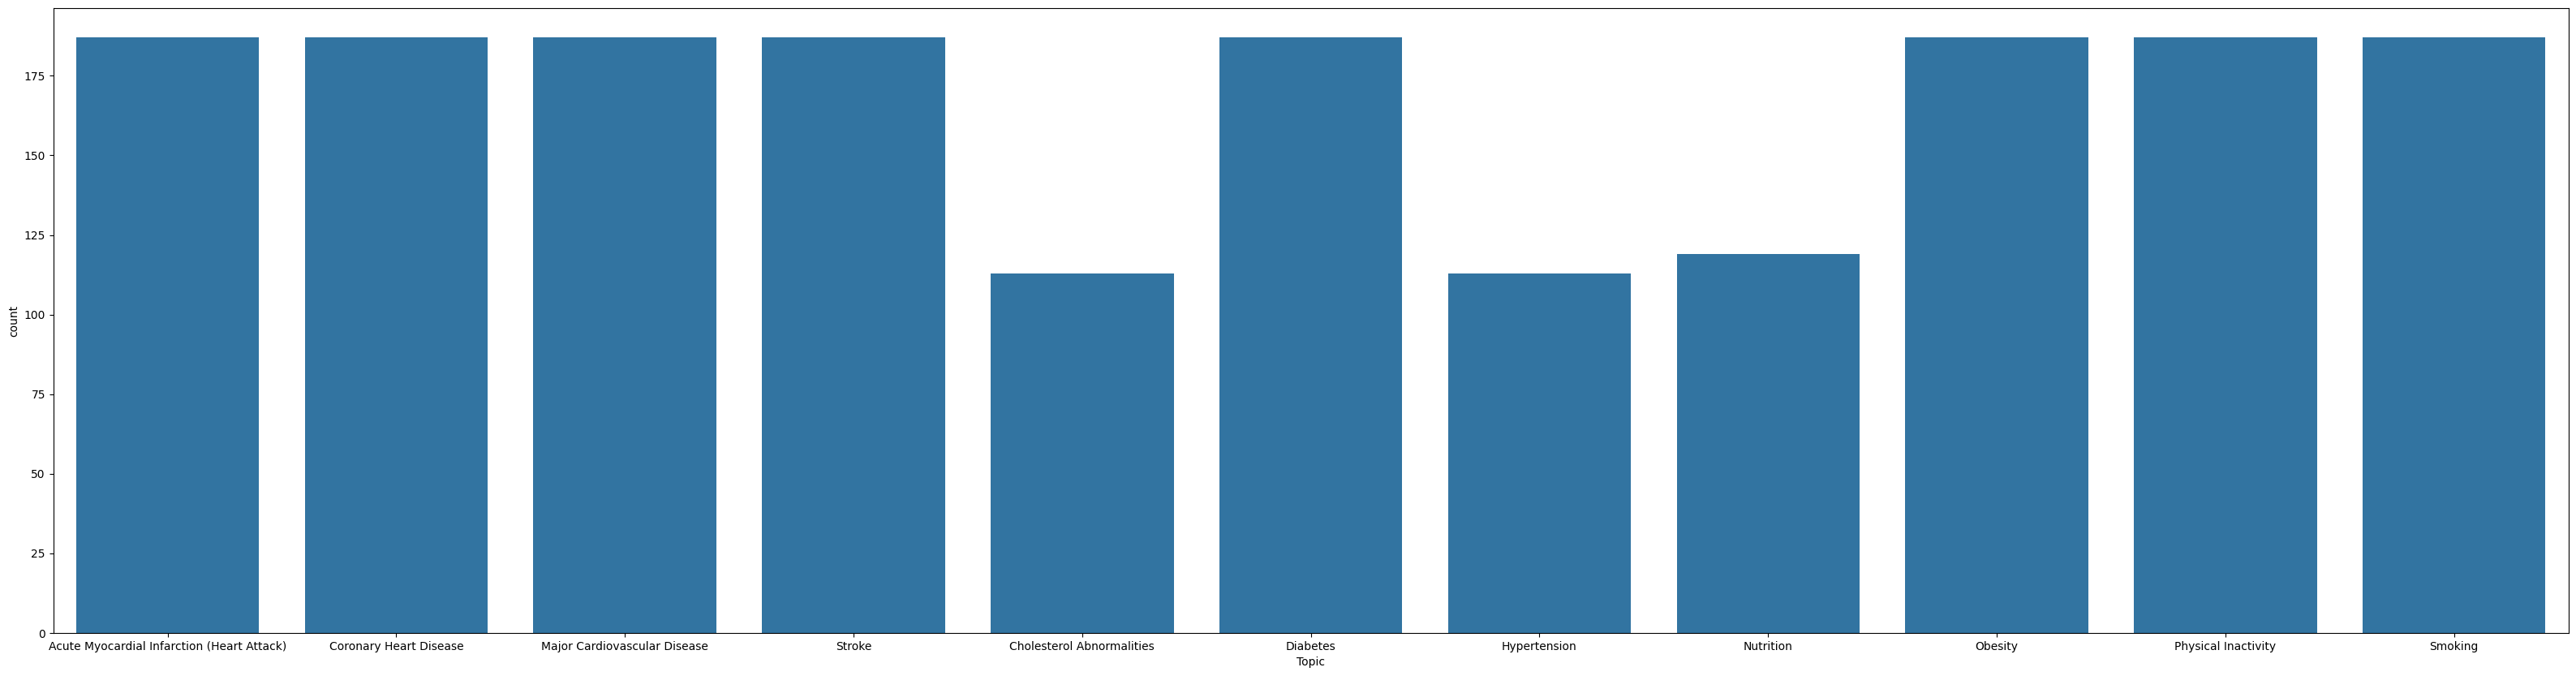

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(x="Topic", data = merged)
plt.show()

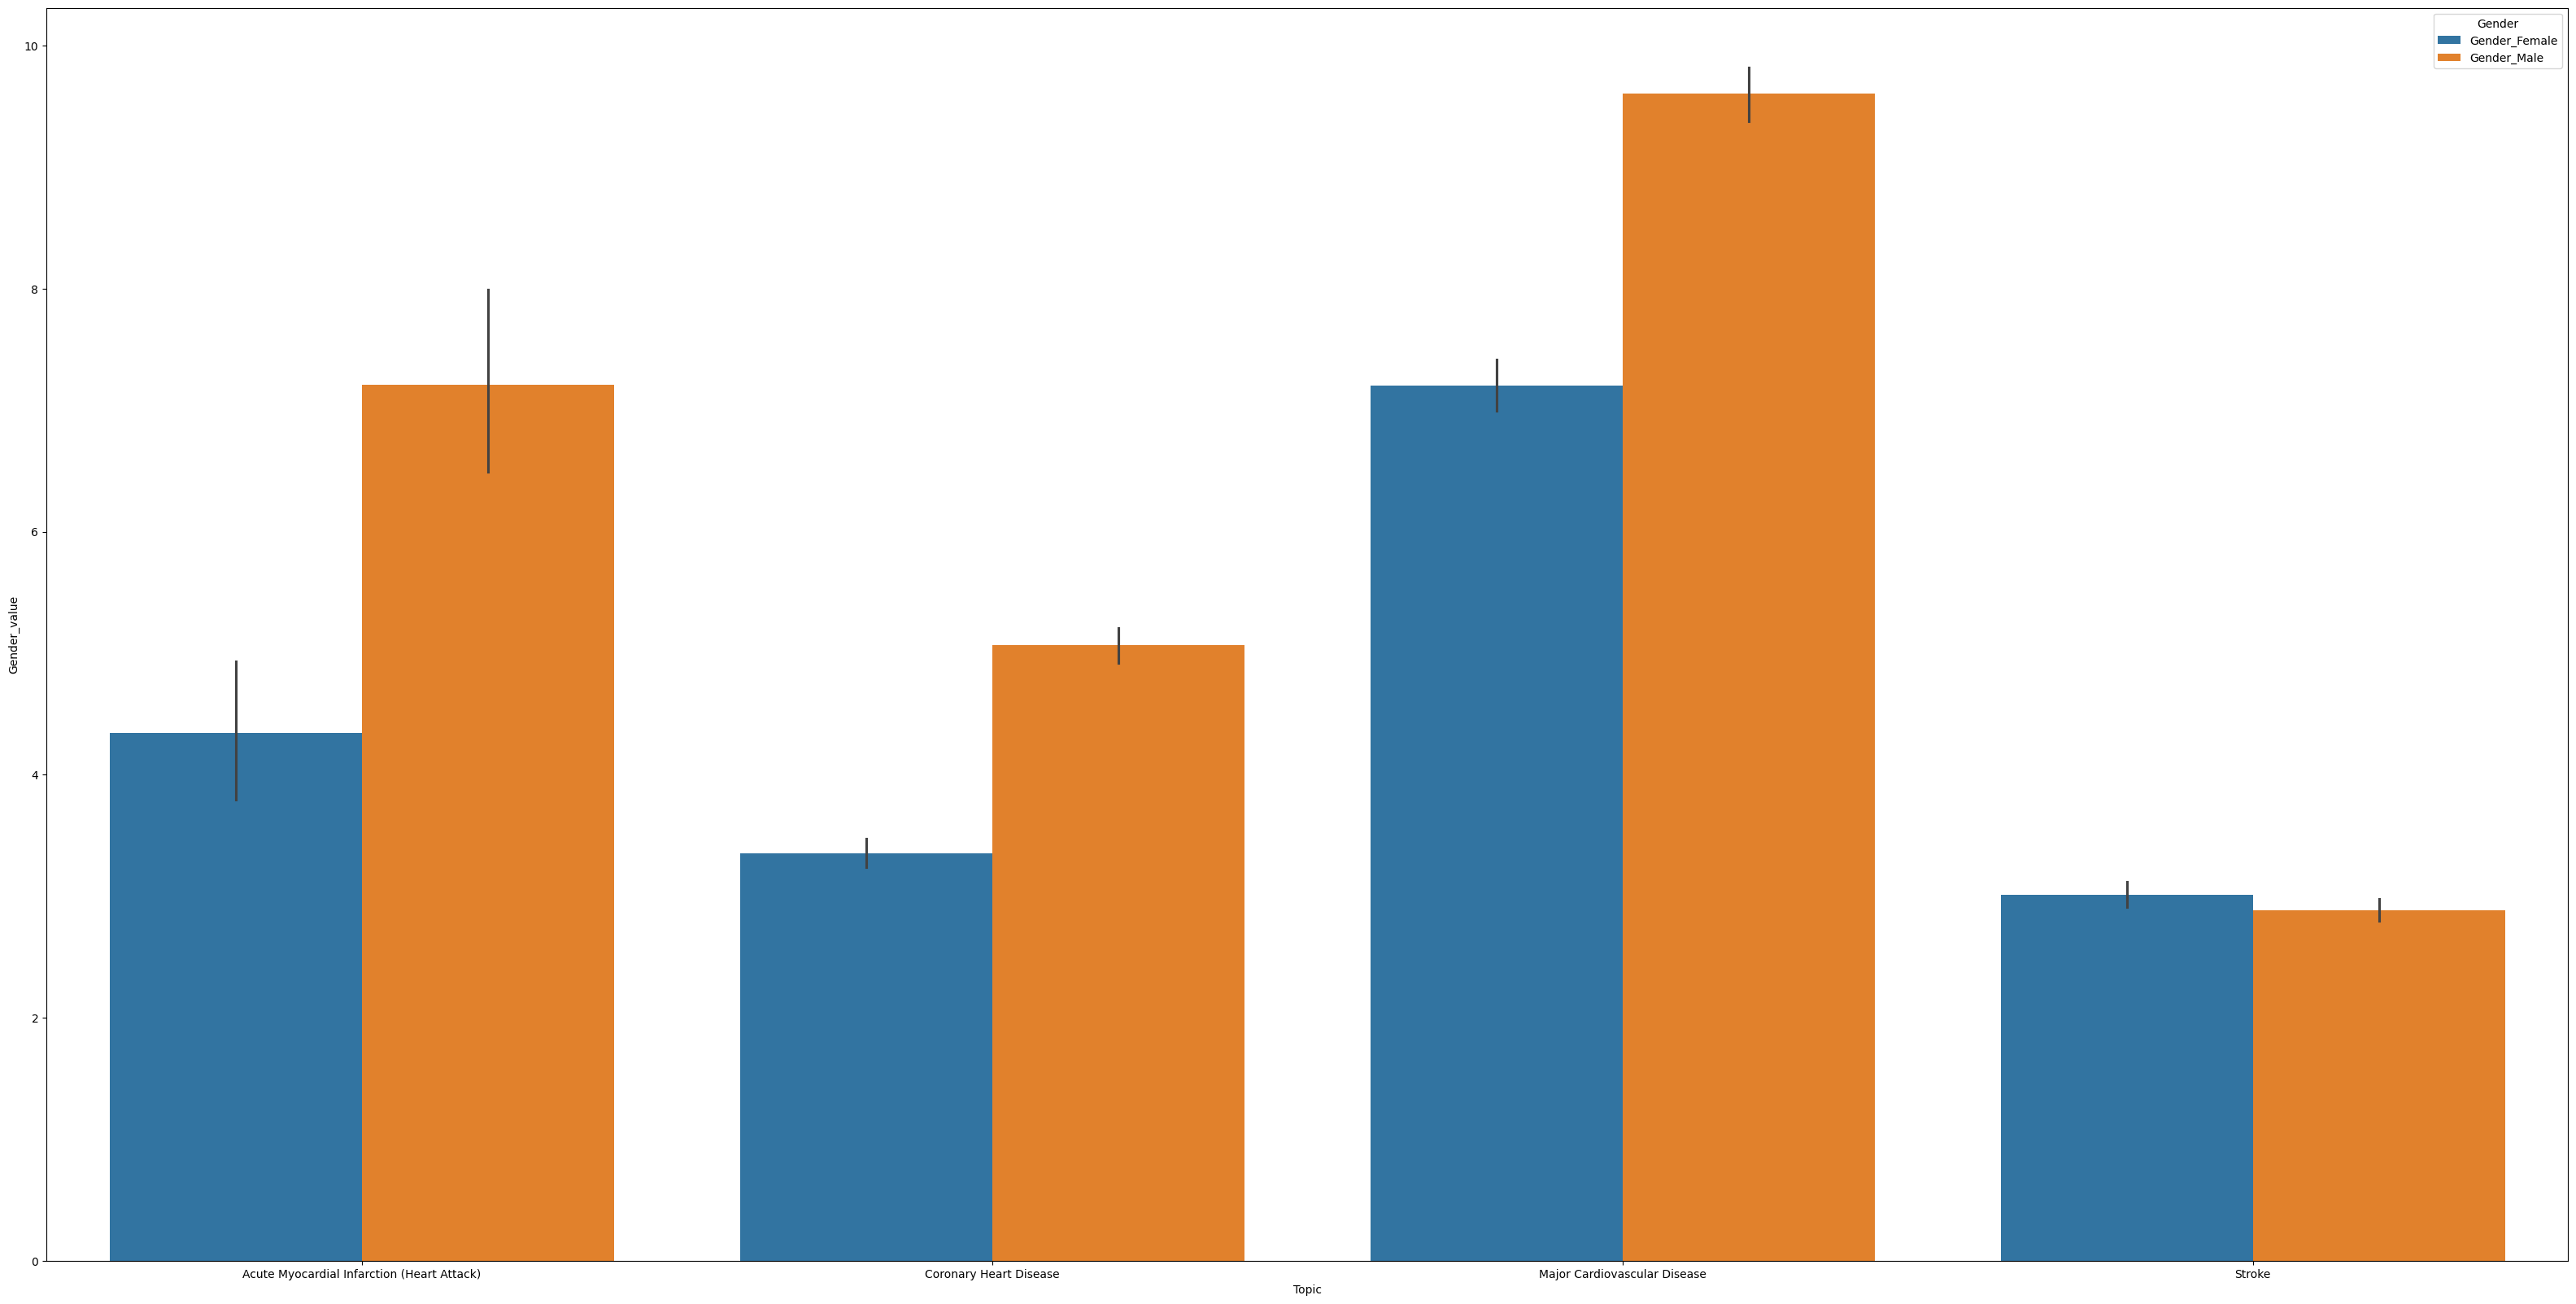

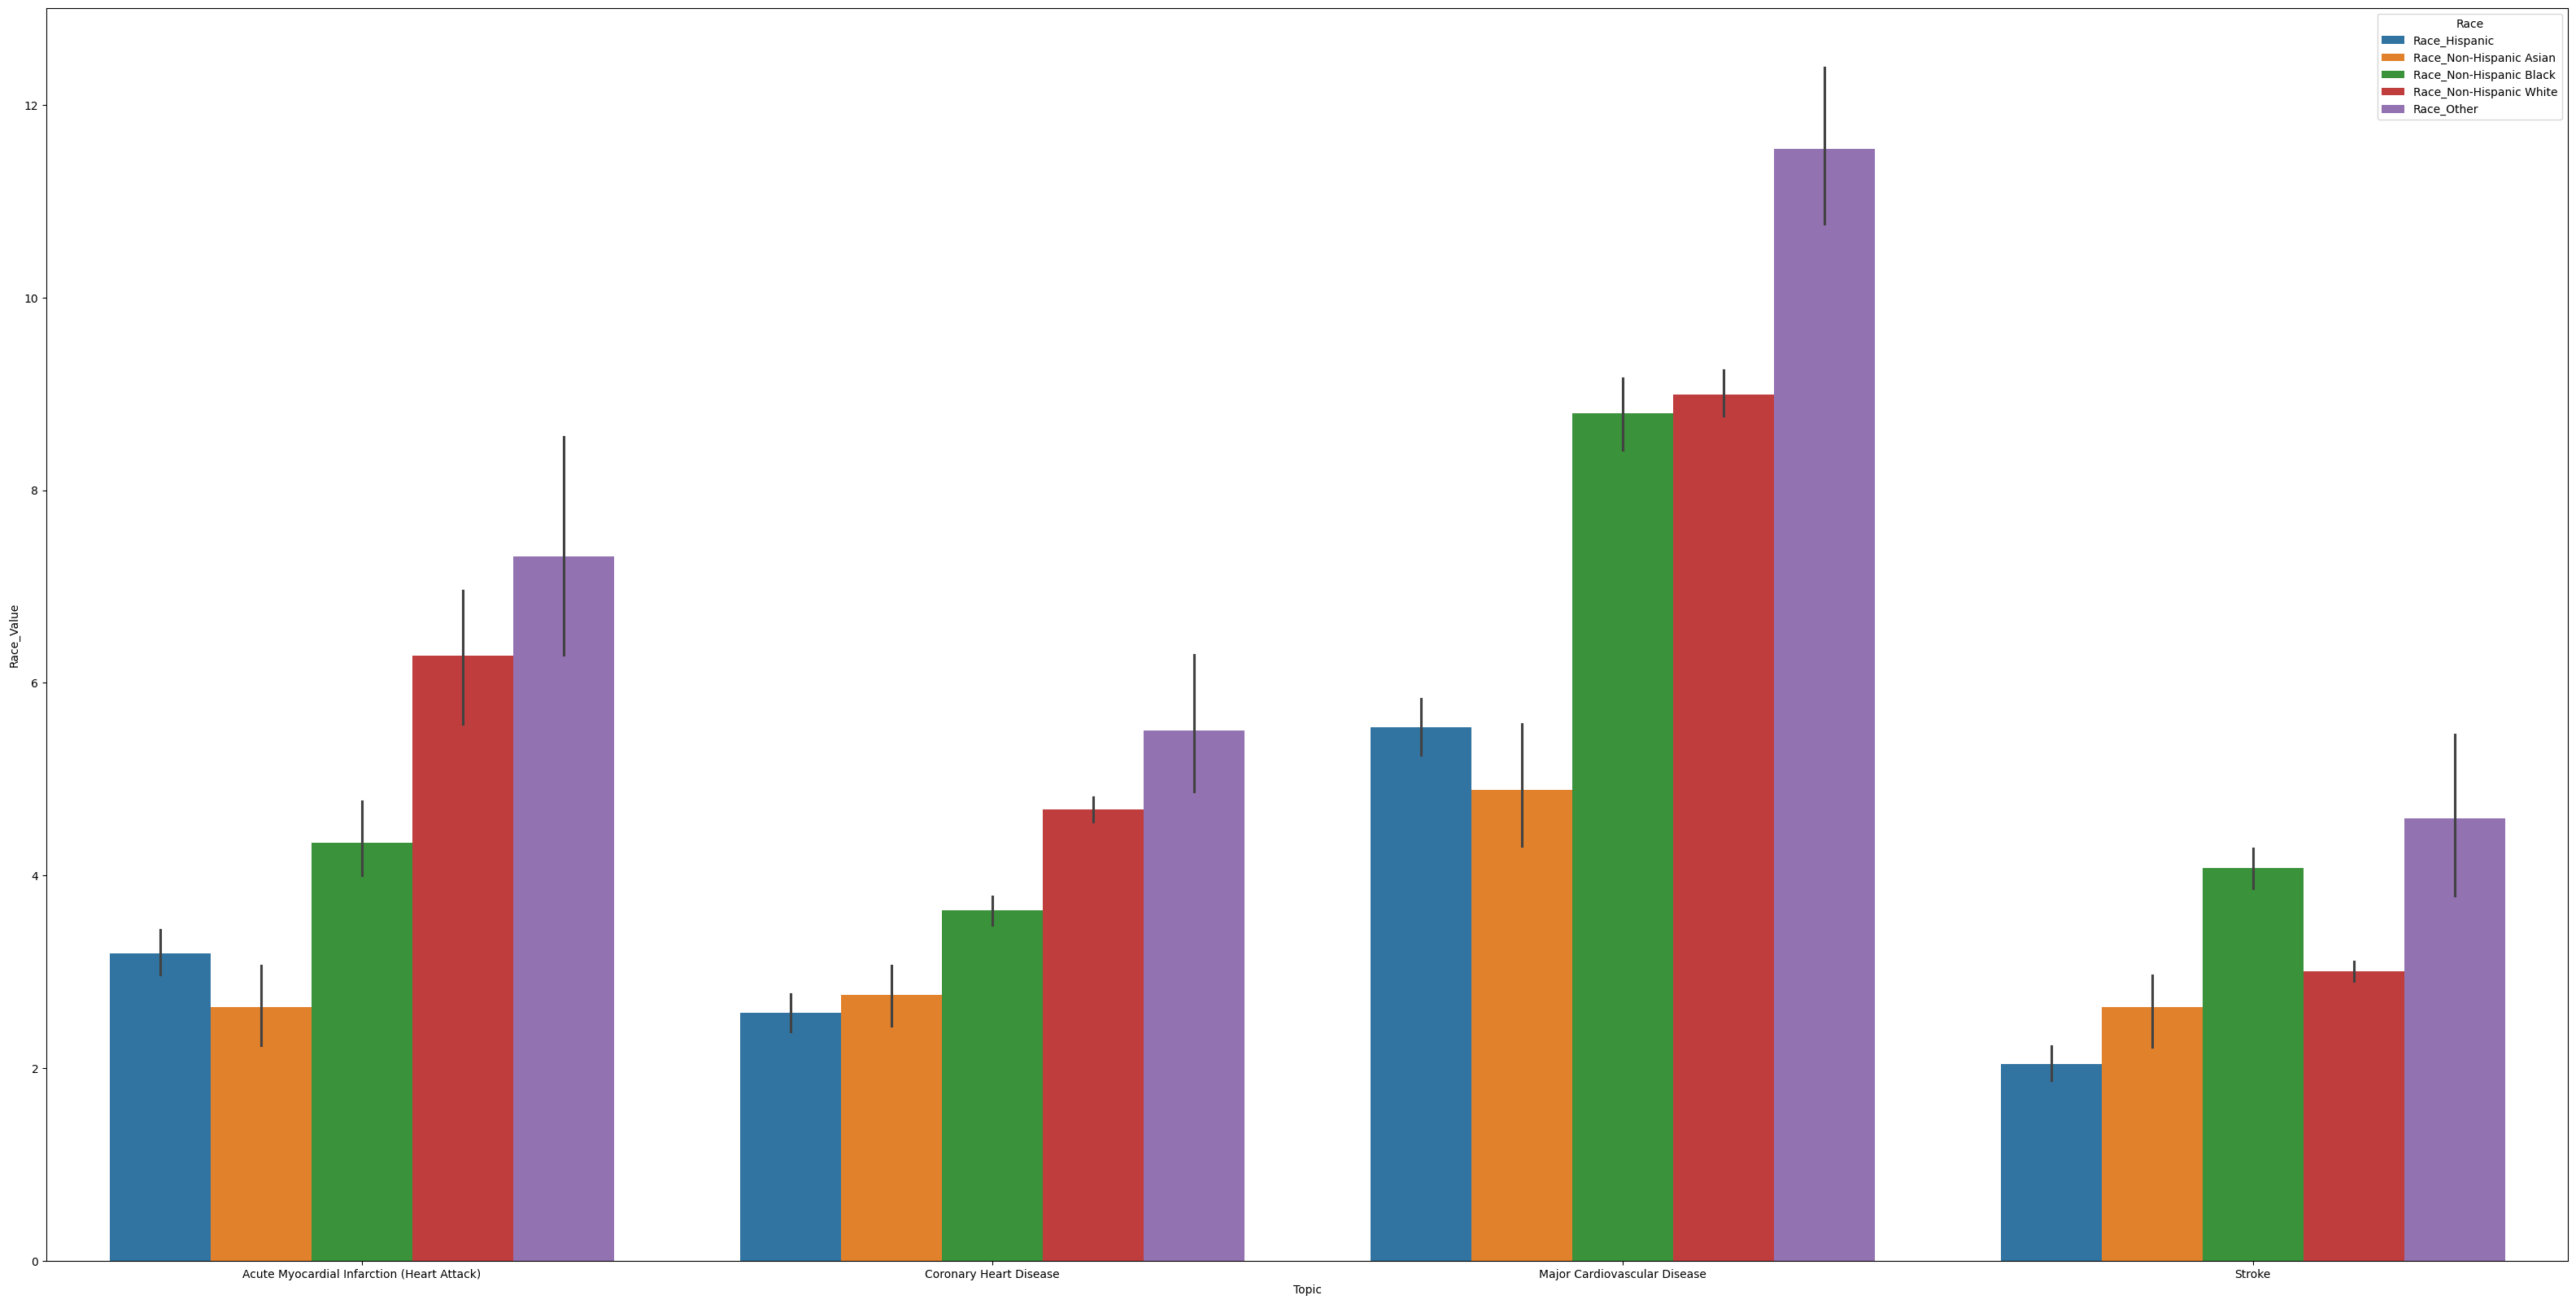

In [ ]:
#side-by-side barplot of percentage for each type of disase based on gender.
cvd = merged[merged["Category"] == "Cardiovascular Diseases"]
relevant = cvd[['Topic','Gender_Female','Gender_Male']]


melt = relevant.melt(id_vars=["Topic"], var_name="Gender", value_name="Gender_value")
plt.figure(figsize = (40,20))
sns.barplot(x = "Topic", y = "Gender_value", data = melt , hue =  "Gender")
plt.show()

#side-by-side barplot of percentage for each type of disease based on race.
cvdnew = merged[merged["Category"] == "Cardiovascular Diseases"]
relevantnew = cvdnew[['Topic',"Race_Hispanic", "Race_Non-Hispanic Asian",
            "Race_Non-Hispanic Black", "Race_Non-Hispanic White", "Race_Other"]]


meltnew = relevantnew.melt(id_vars=["Topic"], var_name="Race", value_name="Race_Value")
plt.figure(figsize = (40,20))
sns.barplot(x = "Topic", y = "Race_Value", data = meltnew , hue =  "Race")
plt.show()

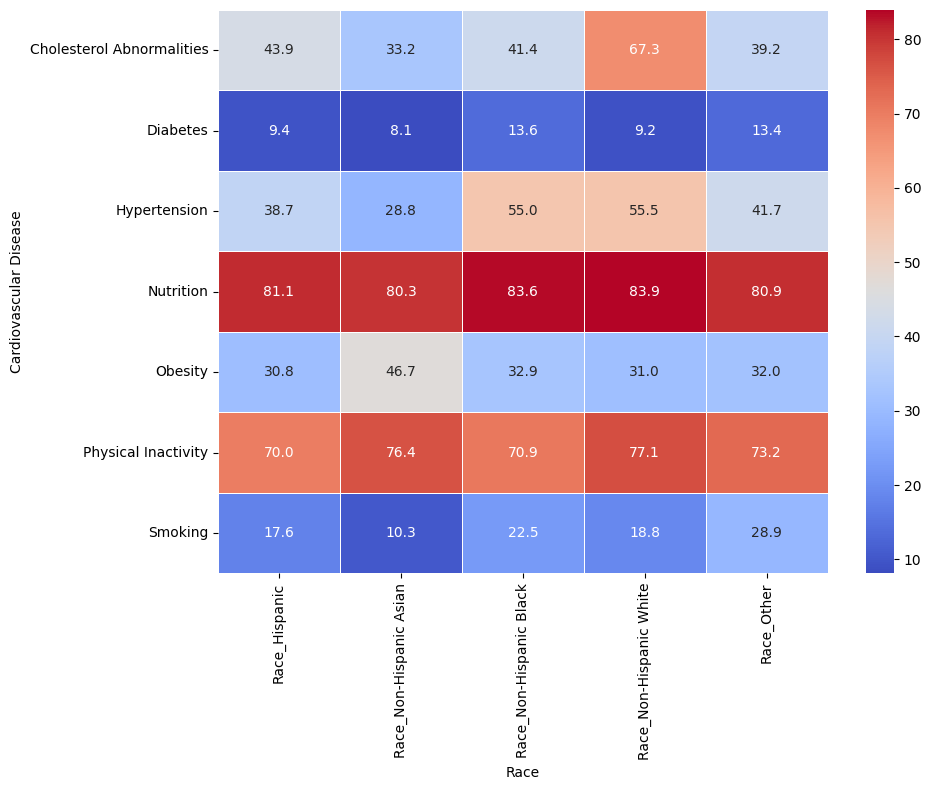

In [ ]:
# Heatmap of Risk Factors across different Race Groups

cvd = merged[merged["Category"]== "Risk Factors"]
race = cvd[["Topic", "Race_Hispanic", "Race_Non-Hispanic Asian",
            "Race_Non-Hispanic Black", "Race_Non-Hispanic White", "Race_Other"]]

raceAgg = race.groupby("Topic").mean()


plt.figure(figsize = (10,8))
sns.heatmap(raceAgg, cmap = "coolwarm", annot = True, fmt = ".1f", linewidths = 0.5)

plt.xlabel("Race")
plt.ylabel("Cardiovascular Disease")
plt.tight_layout()

plt.show()


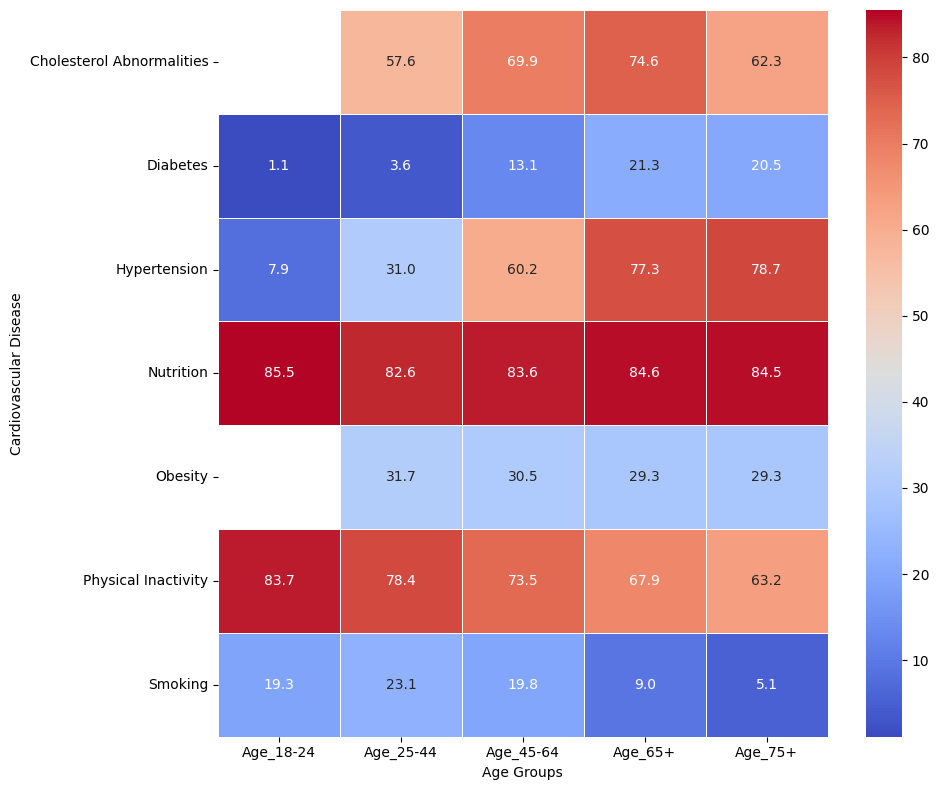

In [ ]:
#Heatmap of Risk Factors across different Age Groups

cvd = merged[merged["Category"]== "Risk Factors"]
age = cvd[["Topic", "Age_18-24", "Age_25-44", "Age_45-64", "Age_65+", "Age_75+"]]

ageAgg = age.groupby("Topic").mean()


plt.figure(figsize = (10,8))
sns.heatmap(ageAgg, cmap = "coolwarm", annot = True, fmt = ".1f", linewidths = 0.5)

plt.xlabel("Age Groups")
plt.ylabel("Cardiovascular Disease")
plt.tight_layout()

plt.show()